In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, recall_score, precision_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('data/SBA_no_missing_data.csv')

In [3]:
df.dtypes

Name              object
City              object
State             object
Zip                int64
Bank              object
BankState         object
NAICS              int64
ApprovalDate      object
ApprovalFY         int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr        float64
LowDoc           float64
GrAppv             int64
MIS_Status         int64
dtype: object

In [4]:
df.dtypes

Name              object
City              object
State             object
Zip                int64
Bank              object
BankState         object
NAICS              int64
ApprovalDate      object
ApprovalFY         int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr        float64
LowDoc           float64
GrAppv             int64
MIS_Status         int64
dtype: object

In [5]:
df['ApprovalFY'] = df['ApprovalFY'].astype(str).str[0:4].astype(int)

In [6]:
df['ApprovalFY'].unique()


array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1983, 1973, 1984, 2007, 1985,
       1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 1967,
       2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976,
       1968, 1969, 1995, 1970, 1996, 1971])

In [7]:
df.dtypes

Name              object
City              object
State             object
Zip                int64
Bank              object
BankState         object
NAICS              int64
ApprovalDate      object
ApprovalFY         int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr        float64
LowDoc           float64
GrAppv             int64
MIS_Status         int64
dtype: object

Matrice de confusion:

Accuracy:
0.947193575177997


/home/antoine/projets/US-SBA/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


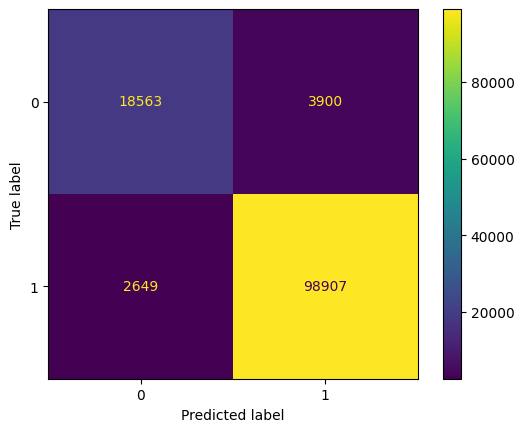

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from xgboost import DMatrix
import pandas as pd
import numpy as np

# Suppression des lignes contenant des valeurs manquantes
df = df.dropna()

# Séparer les variables indépendantes et la variable dépendante
X = df.drop(['MIS_Status'], axis=1)
y = df['MIS_Status']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Créer le transformateur pour les colonnes catégorielles
categorical_features = [  'ApprovalDate']
categorical_transformer = Pipeline(steps=[
    
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))])

# Créer le transformateur pour les colonnes numériques
numerical_features =['Term','NoEmp','FranchiseCode','NAICS', 'ApprovalFY','NewExist', 'LowDoc', 'GrAppv', 'CreateJob', 'RetainedJob','UrbanRural', 'RevLineCr']
numerical_transformer = StandardScaler()

# Créer le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Créer le pipeline
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier())])

# Entraîner le modèle
pipeline_xgb.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = pipeline_xgb.predict(X_test)

# Calculer les métriques
print("Matrice de confusion:")
cf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

cf_matrixD = ConfusionMatrixDisplay(cf_matrix)
cf_matrixD.plot()


In [9]:
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     22463
           1       0.96      0.97      0.97    101556

    accuracy                           0.95    124019
   macro avg       0.92      0.90      0.91    124019
weighted avg       0.95      0.95      0.95    124019



In [10]:
import pickle

# Enregistre le modèle
with open('modele.pkl', 'wb') as fichier_modele:
    pickle.dump(pipeline_xgb, fichier_modele)


/home/antoine/projets/US-SBA/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


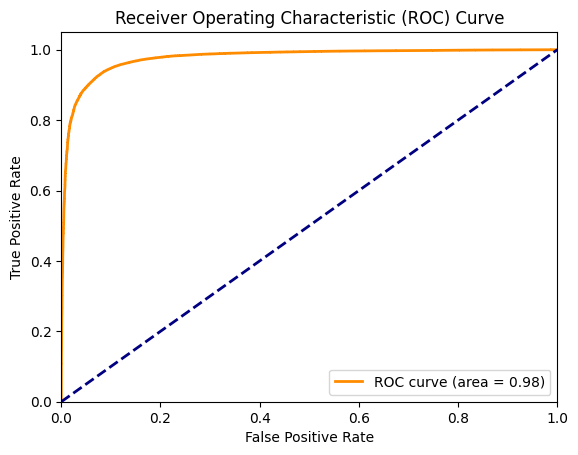

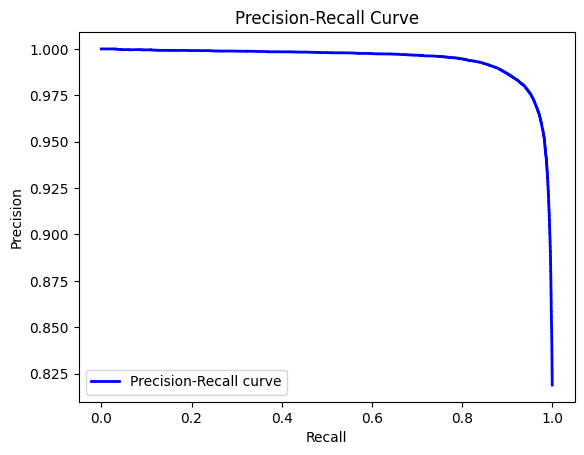

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Calculer les probabilités prédites pour la classe positive
y_pred_proba = pipeline_xgb.predict_proba(X_test)[:, 1]

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Courbe de précision-rappel
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

/home/antoine/projets/US-SBA/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/antoine/projets/US-SBA/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/antoine/projets/US-SBA/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/antoine/projets/US-SBA/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/antoine/projet

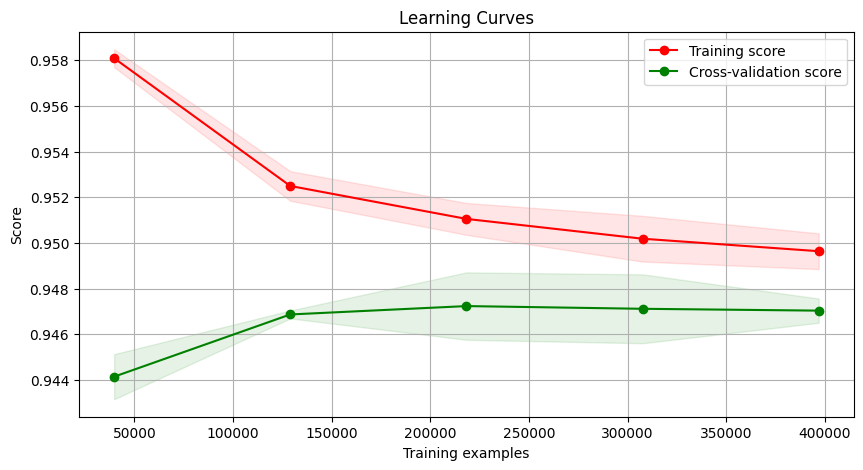

In [12]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay


train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(pipeline_xgb, X_train, y_train, cv=5, n_jobs=-1,
                   train_sizes=np.linspace(.1, 1.0, 5), return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

plt.figure(figsize=(10, 5))
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")

plt.show()


In [13]:
#Obtenir les importances des caractéristiques du modèle XGBoost
feature_importances = pipeline_xgb.named_steps['classifier'].feature_importances_

#Obtenir les noms des caractéristiques transformées
feature_names = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()

#Créer un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#Afficher les importances des caractéristiques
importance_df.head(15)

,Feature,Importance
0,num__Term,0.230460
4,num__ApprovalFY,0.114966
2,num__FranchiseCode,0.049480
10,num__UrbanRural,0.044063
11,num__RevLineCr,0.031213
7,num__GrAppv,0.016731
5,num__NewExist,0.013378
8,num__CreateJob,0.008790
9,num__RetainedJob,0.007526
1,num__NoEmp,0.006847


In [21]:
row_index_1 = df.loc[1]
print(row_index_1)

Name             LANDMARK BAR & GRILLE (THE)
City                               NEW PARIS
State                                     IN
Zip                                    46526
Bank                         1ST SOURCE BANK
BankState                                 IN
NAICS                                 722410
ApprovalDate                       28-Feb-97
ApprovalFY                              1997
Term                                      60
NoEmp                                      2
NewExist                                 2.0
CreateJob                                  0
RetainedJob                                0
FranchiseCode                              1
UrbanRural                                 0
RevLineCr                                0.0
LowDoc                                   1.0
GrAppv                               4000000
MIS_Status                                 1
Name: 1, dtype: object


In [22]:
import pandas as pd
import pickle


real_values = pd.DataFrame({
    'ApprovalDate': ['28-Feb-97'],
    'Term': [60],
    'NoEmp': [2],
    'FranchiseCode': [1],
    'NAICS': [722410],
    'ApprovalFY': [1997],
    'NewExist': [2.0],
    'LowDoc': [1.0],
    'GrAppv': [4000000],
    'CreateJob': [0],
    'RetainedJob': [0],
    'UrbanRural': [0],
    'RevLineCr': [0.0]
})

input_data = pd.DataFrame(real_values, index=[0])



with open('modele.pkl', 'rb') as file:
    model = pickle.load(file)


y_pred_input = model.predict(input_data)



print("Prédictions:", y_pred_input)

Prédictions: [1]


In [23]:
import pandas as pd
import pickle



new_data_generated = pd.DataFrame({
    'ApprovalDate': ['2-Jun-80'],
    'Term': [45],
    'NoEmp': [45],
    'FranchiseCode': [0],
    'NAICS': [0],
    'ApprovalFY': [1980],
    'NewExist': [2.0],
    'LowDoc': [1.0],
    'GrAppv': [60000000],
    'CreateJob': [0],
    'RetainedJob': [0],
    'UrbanRural': [0],
    'RevLineCr': [0.0]
})


input_data = pd.DataFrame(new_data_generated, index=[0])



with open('modele.pkl', 'rb') as file:
    model = pickle.load(file)


y_pred_input = model.predict(input_data)



print("Prédictions:", y_pred_input)


Prédictions: [0]
